# Clustering - K-Means | Lecture 1

process of organizing objects into groups whose members are similar in some way

learning useful structue without labeled classes, optimization criterion, feedback signal, or any other information beyond the raw data

a form of unsupervised learning?

## Example Algorithms

- K-means

- expectation maximization (EM)

- hierarchical

## Example Uses

- market basket analysis

- clothes sizing

- document collection

- medicine

- many more

## Approaches

- partitional vs hierarchical

- agglomerative vs devisive

- hard vs fuzzy

## Example: a cholera outbreak in London

in 1854, during a cholera outbreak in London, John Snow plotted the location of cases on a map.

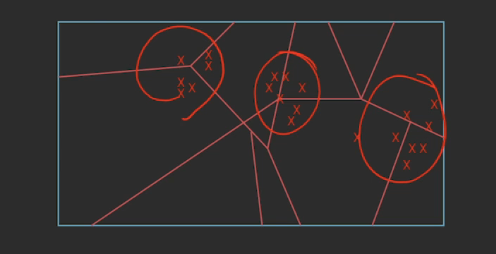

# Partitional vs Hierarchical Clustering

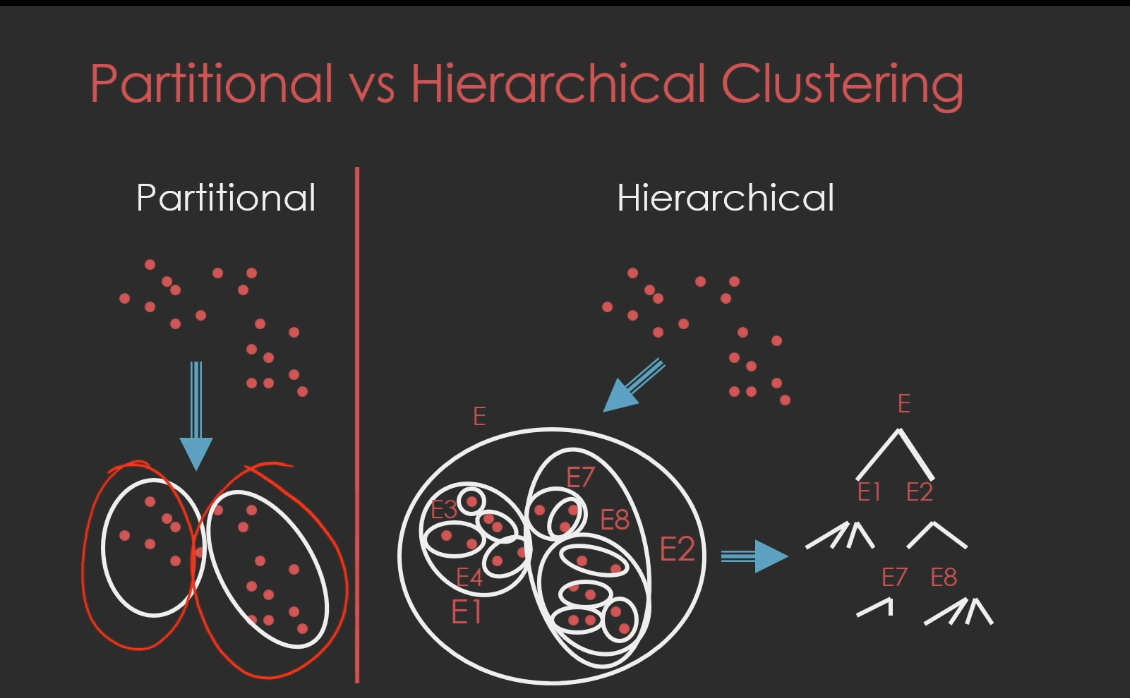

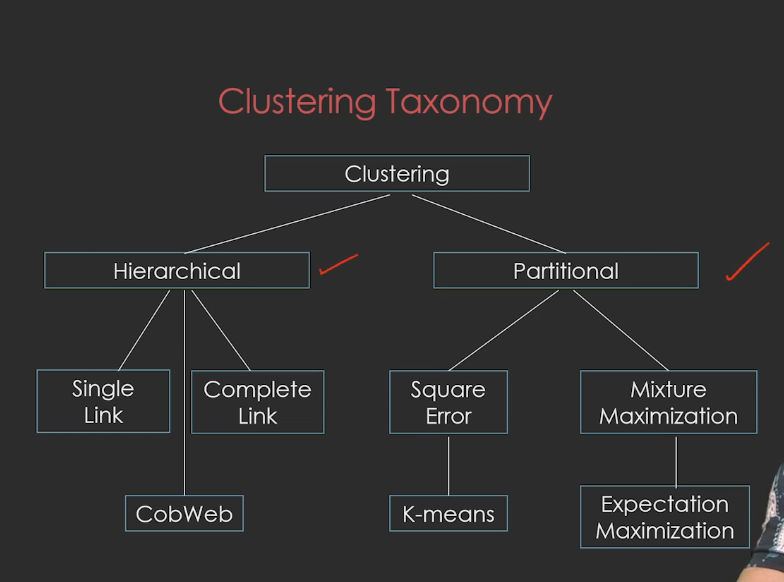

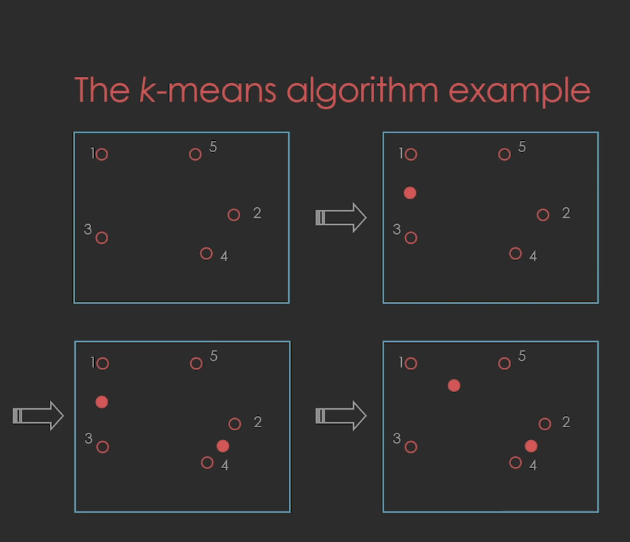

take the 5 points and take a median between two points, next place another centroid close to the median of another cluster.

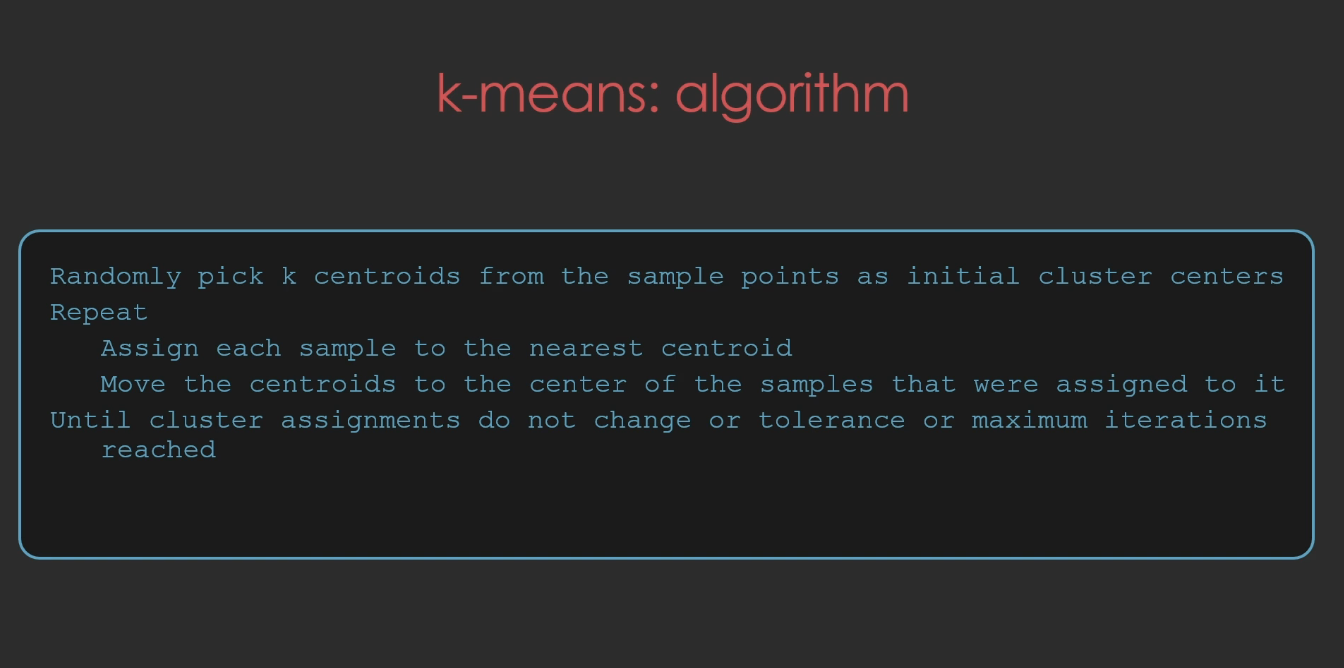

## Example SSE & Distance Measure

$J = \sum^k_{j=1} \sum^n_{i=1}||x^{(j)}_i - c_j||^2$

- $J$ = objective function

- $k$ = number of clusters

- $n$ = number of cases

- $i$ = case

- $||x^{(j)}_i - c_j||^2$ = distance function

- $c_j$ = centroid for cluster $j$

K-means: predetermined number of clusters. Start with seed cluster of one element.

seeds are randomly chose

keep calculating new centroids until better defined clusters are present

In [ ]:
# practicing kmeans
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

In [ ]:
# plot results
import matplotlib.pyplot as plt

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolors='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolors='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km, 2, 0],
    X[y_km, 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolors='black',
    label='cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolors='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## Variations/Questions

- how to pick k?

- how to initialize the k centroids?
    - randomly
    - pick points sufficiently faw away from any other centroid until there are k (in sckikit-learn set the init parameter to k-means++)

- when to stop?
    - no (or minimum) re-assignments
    - minimum decrease in SSE
    - maximum iterations

## Determining k

- when k=1, all the points are in one cluster, and the average distance to the centroid will be high

- when k=2, one of the clusters will be by itself and the other two will be forced into one cluseter. The average distance of points to the centroid will shring considerably.

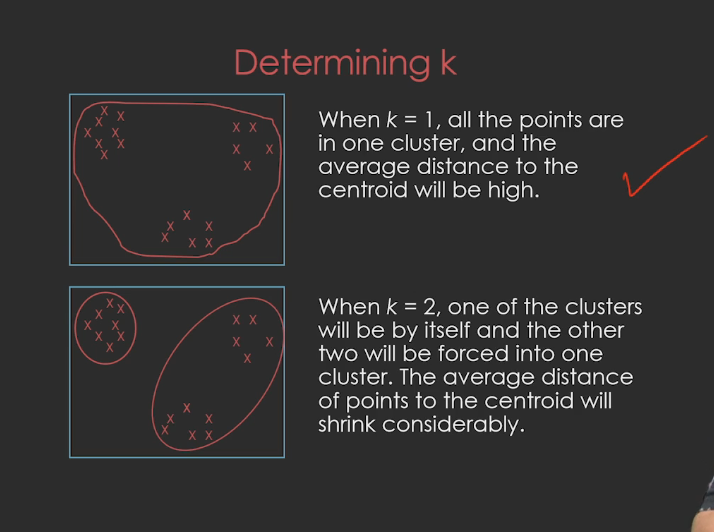

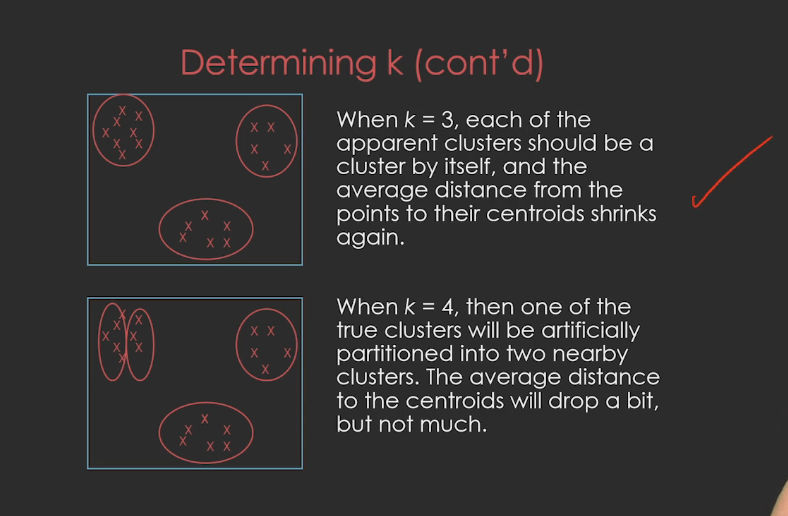

## Determining the best K

- Cluster inertia
    - scikit-learn calculates so we can use to tune 
    - known as the elbow method
    - can also use silhouette plots in scikit-learn

## Elbow Method

In [ ]:
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )

    km.fit(X)
    distortions.append(km.intertia_)

plt.plot(
    range(1, 11), 
    distortions,
    marker='o'
)

plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()




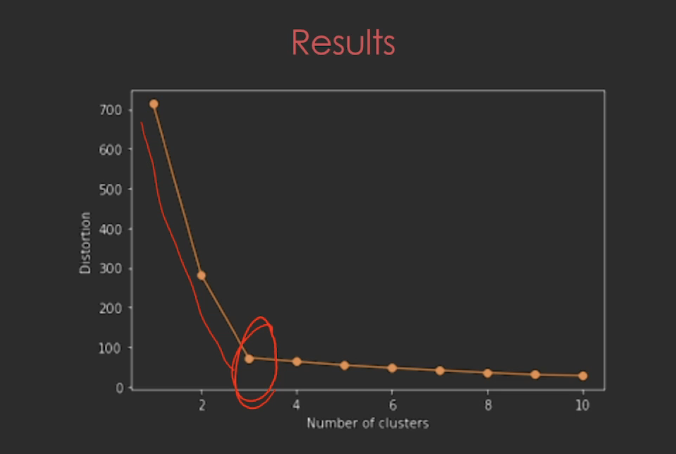

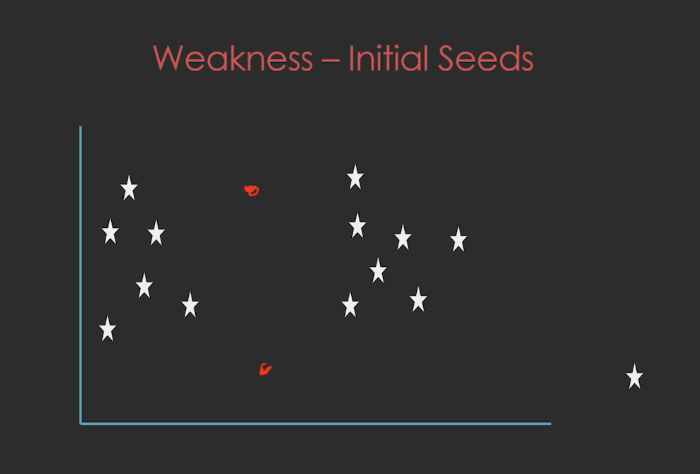

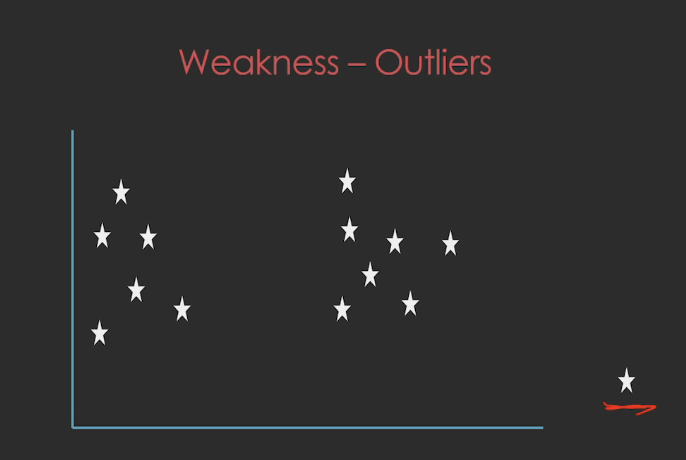

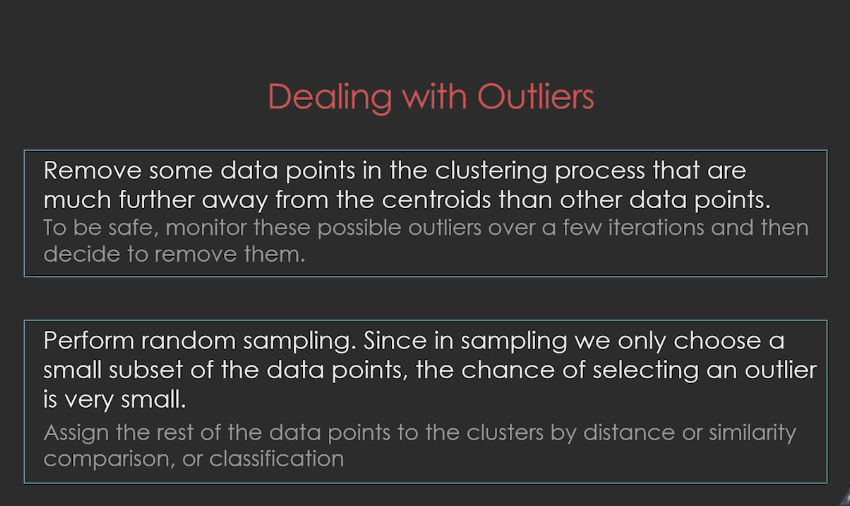

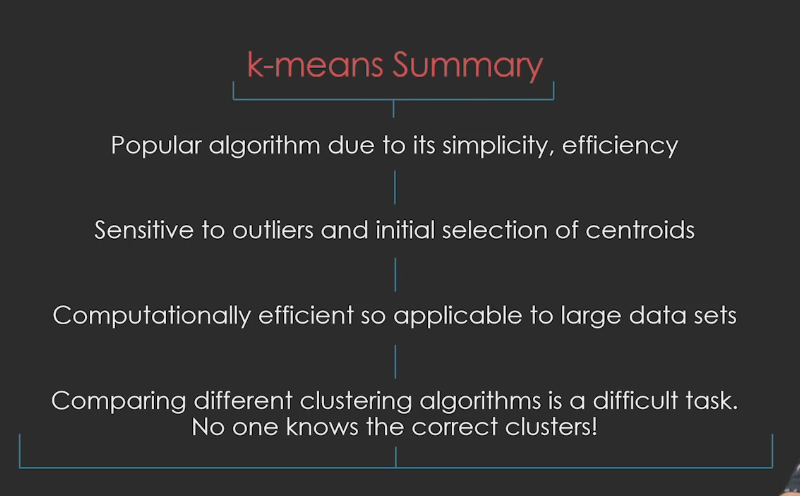

# Hierarchical Clustering | Lecture 2

- Dendrograms - binary visualization

- no need to pre=determine number of clusters

- agglomerative
    - single linkage
    - total linkage

- divisive

## Dendrogram

- agglomerative (bottom up) clustering
    - builid from the bottom level, and
        - merges the most similar (or nearest) pair of clusters
        - stops when all the data points are merged into a single cluster (i.e., the root cluster)

- devisive (top down) clustering
    - it starts with all data points in one cluster, the root.
        - splits the root into a set of child clusters. each child cluster is recursively divided further
        - stops when only a singleton clusters of individual data points remain, i.e., each cluster with only a sigle point

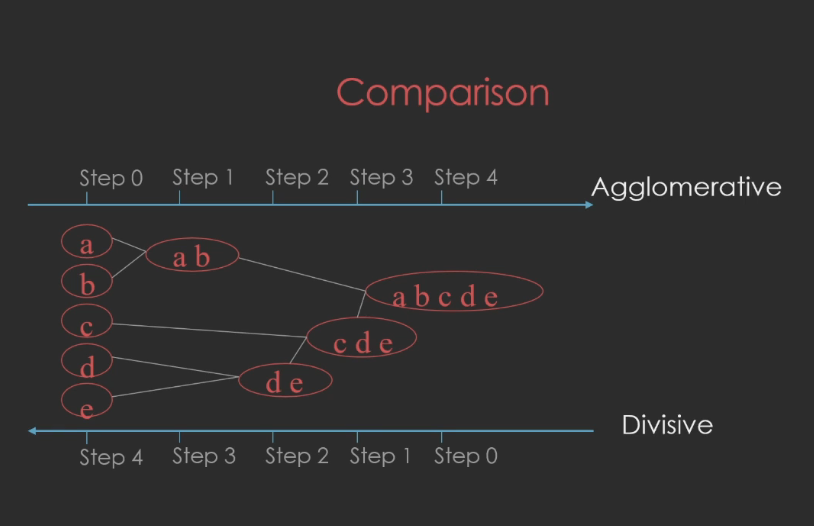

agglomerative and devisive end up with the same result

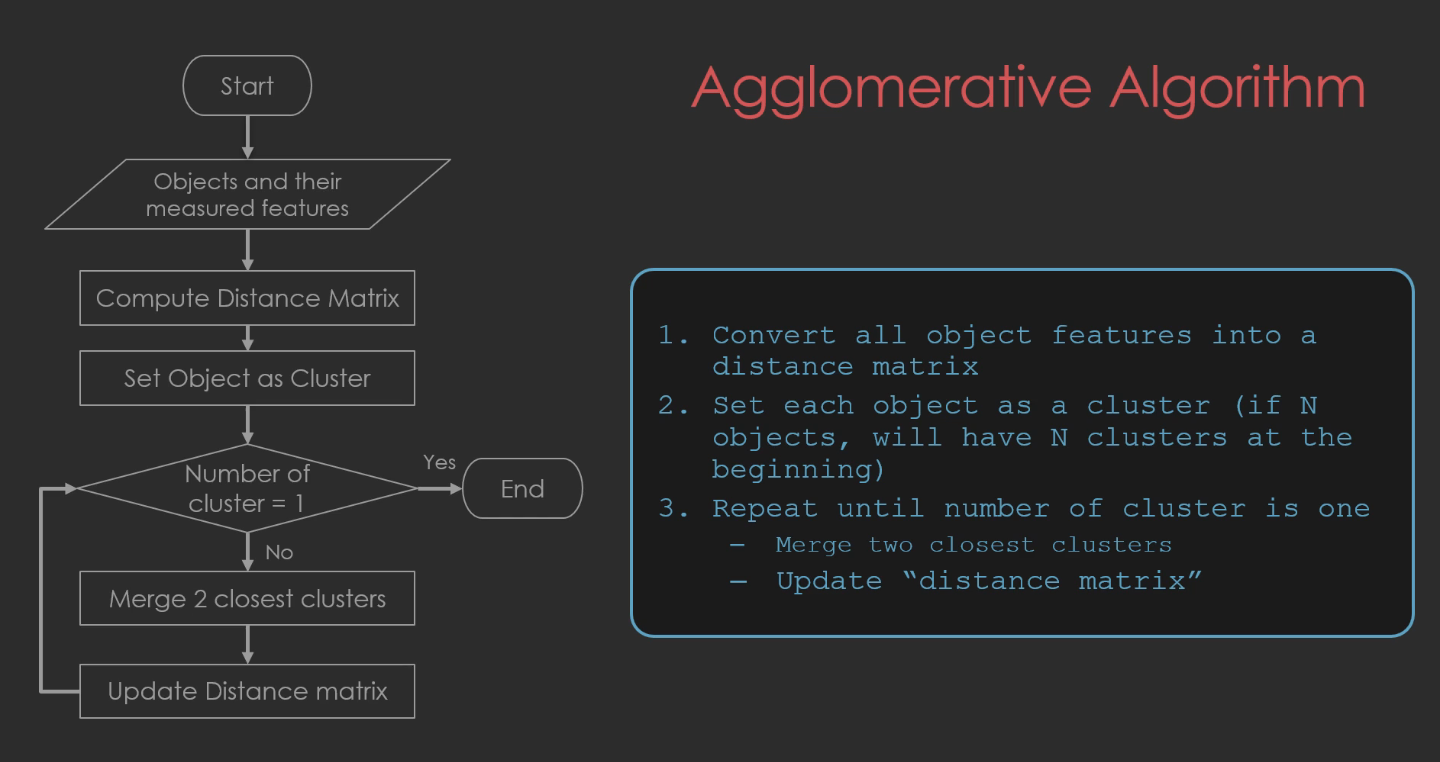

## Hierarchical distance measures

- single-link (most commont)
    - distance between two clusters = minimum of distance between all distances
    - more versatile
    - produces (sometimes too) elongated clusters

- complete-link
    - distance between two clusters = maximum of all distances between instances in the clusters
    - tightly bound, compact clusters
    often more useful in practice

- average-link
-centroid

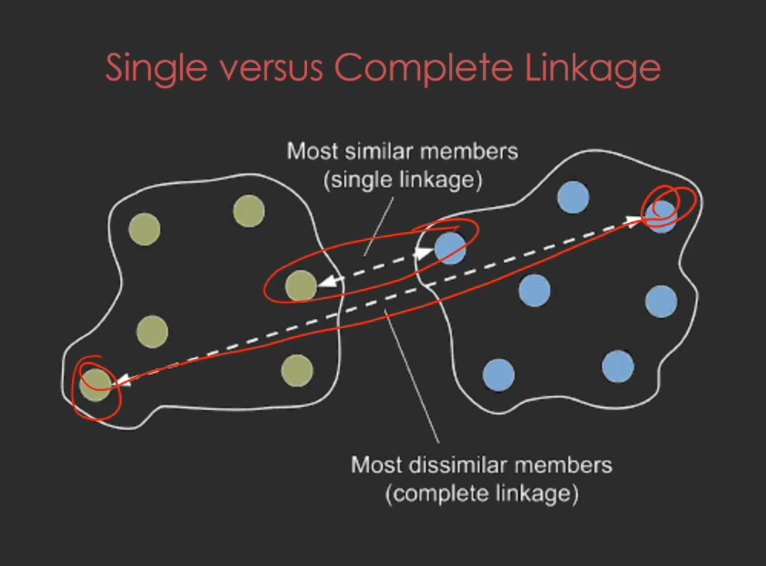

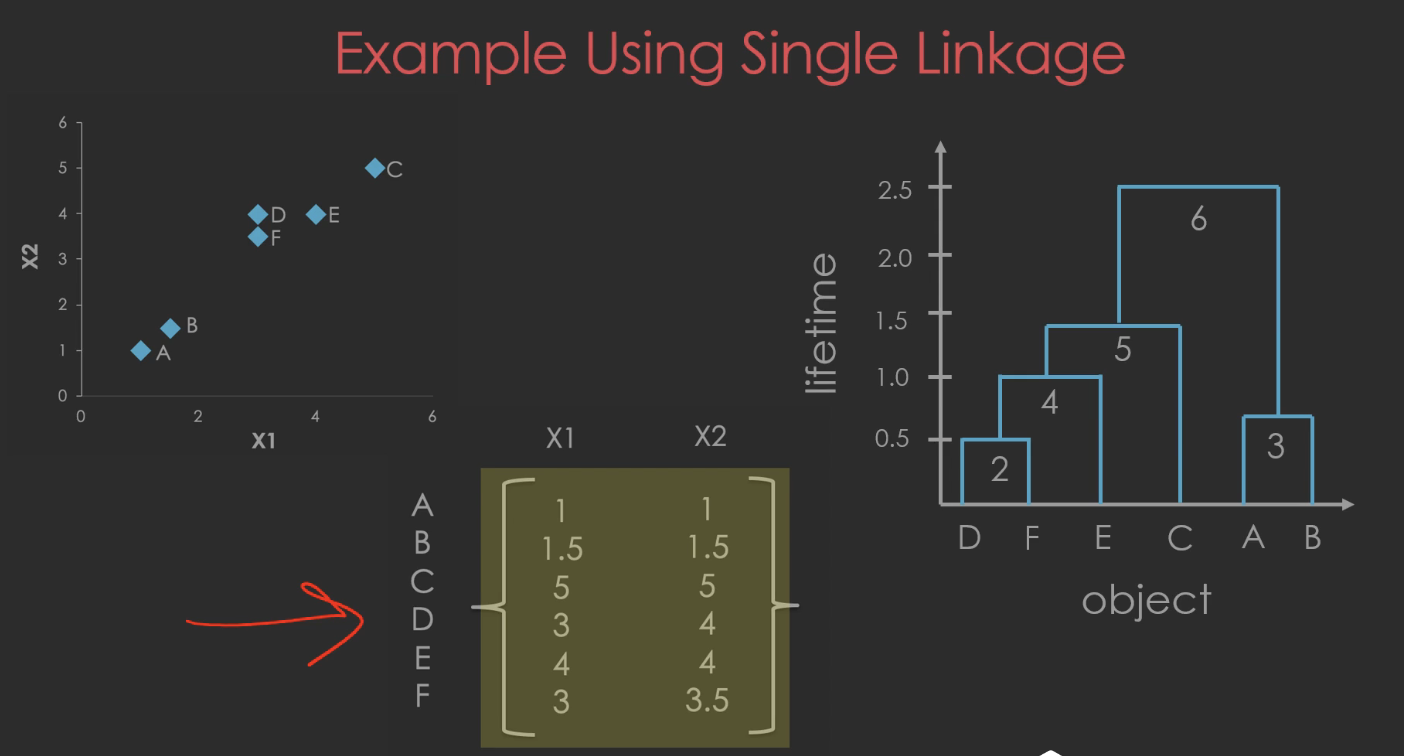

## comments on distances measures

- all the algorithms are at least O(n^2) where n is the number of data points
- single link can be done on O(n^2)
- complete and average links can be done in O(n^2ogn)

## Distance Functions

- key to clustering. "similarity" and "dissimilarity"

- there are numerous distnace functions for 
    - different types of data
        - numeric data
        - nominal data
        - binary data
    - different specific applications

## Distance functions for numerica attributes

- most commonly used functions are 
    - Euclidean distance 
    - Manhattan (city block) distance

- we denote distance with dist(x_i, x_j), where x_i and x_j are data points (vectors)

- they are special cases of minkowski distance 

$$((x1-y1)^P + (x2 - y2)^P + ... + (xN - yN)^P)^{1/P}$$

## Euclidean distance and manhattan distance

if h=2, it is the euclidean distance

$$\sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + ... + (x_{ir} - x_{jr})^2}$$

If h=1, it is the manhattan distance

$$|x_{i1} - x_{j1}| + |x_{i2} - x_{j2}| + ... + |x_{ir} - x_{jr}|$$

Weighted Euclidean distance

$$\sqrt{w_1(x_{i1} - x_{j1})^2 + w_2(x_{i2} - x_{j2})^2 + ... + w_3(x_{ir} - x_{jr})^2}$$

# Hierarchical Clusterin in python with SciPy and SciKit-Learn and other techniques | Lecture 3

## performing hierarchical clustering on a distance matrix

In [1]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd

row_dist = pd.DataFrame(
    squareform(pdist(
        df, metric = 'euclidean'
    )),
    columns=labels,
    index=labels
)

row_dist

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


## caution

- we can either pass a condensed distance matrix (upper triangular) from the pdist function

- we can pass the original data array and define the metric='euclidean' argument in linkage

- however, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

## call to linkage

two ways to call to linkage

In [ ]:
# example 1
row_clusters = linkage(pdist(df, metric='euclidean'), method='compmlete')

# example 2
row_clusters = linkage(df.values, method='complete', metric='euclidean')

pd.DataFrame(
    row_clusters,
    columns=[
        'row label 1',
        'row label 2',
        'distance',
        'no. of items in clust'
    ],
    index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
)

In [ ]:
# call to df to build dendrogram
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(
    row_clusters, 
    labels=labels,
    # make dendrogram black (part 2/2)
    # color_threshold=np.inf
)

plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

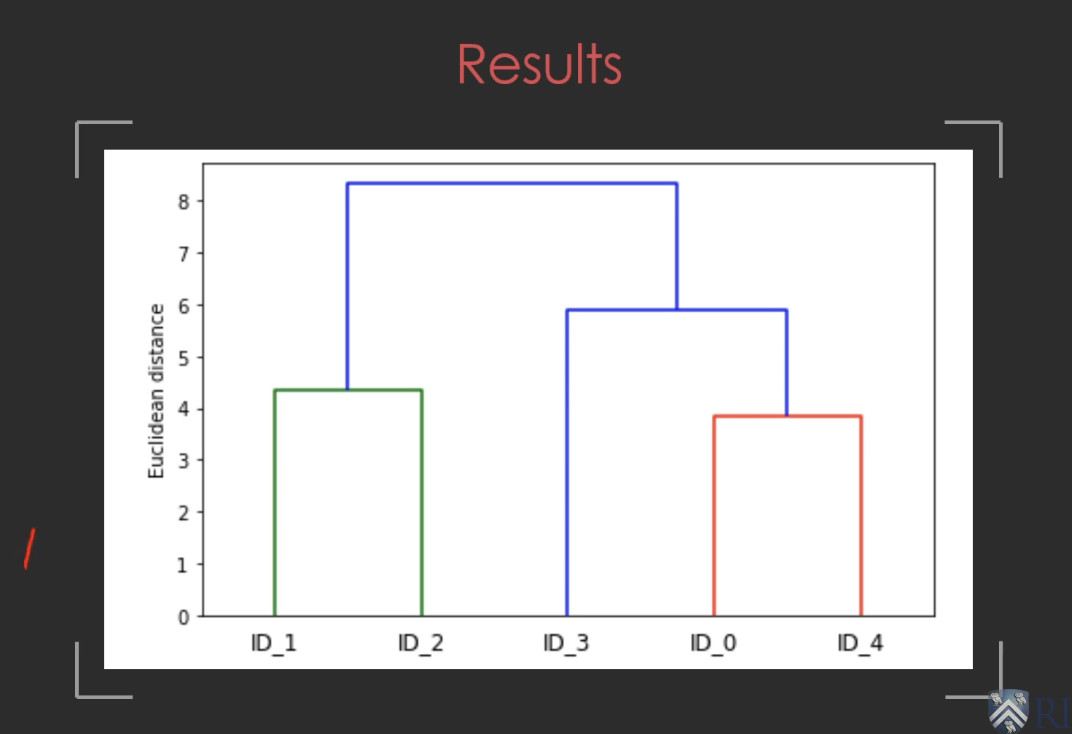

In [ ]:
# creating a heat map
# plot row dendrogram
fig = plt.figure(figsize=(8, 1), facecolor='white')
axd = fig.add_axes([
    0.09,
    0.1, 
    0.2,
    0.6
])

row_dendr = dendrogram(
    row_clusters,
    orientation='left'
)

# reorder data with respect to clustering
df_rowclust = df.iloc(row_dendr['leaves'][::-1])

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm=fig.add_axes([
    0.23, 
    0.1,
    0.6,
    0.6
]) # x-pos, y-pos, width, height

cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('images/11_12.png', dpi=300)
plt.show()

## using scikit-learn instead of SciPy for agglomerative clustering (hierarchical clustering)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# using 3 clusters
ac = AgglomerativeClustering(
    n_clusters=3,
    affinity='euclidean',
    linkage='complete'
)

labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

# using 2 clusters
ac = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    linkage='complete'
)

labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

## how do we handle this type of data in classification?

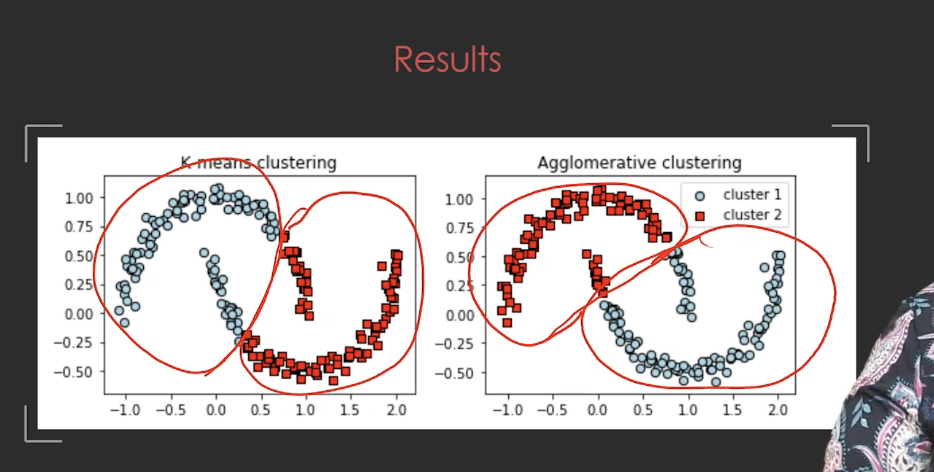

## Density Scan (DBSCAN)

- DBSCAN: density based spatial clustering of applications with noise

- Core Point: at least a specified number (MiniPts) of neighboring points fall within a specified radius $\epsilon$

- Border Point: has fewer neighbors than MiniPts within $\epsilon$

- Noise Point: all toher points

- Algorithm:
    - form a cluster for each core point or connected group of core points
    - assign each border point to the cluster of its corresponding core point

## DBSCAN Algorithm

1. pick a point at random that has not been assigned to a cluster or been designated as an outlier

2. compute it's neighborhood to determine it it's a core point. if yes, start a cluster around this point. If no, label the point as an outlier

3. once we find a core point and thus a cluster, expand the cluster by adding all directly-reachable points to the cluster

4. perform "neighborhood jumps" to find all density-reachable points and add them to the cluster

5. if an outlier is added, change that points status from outlier to border point

6. repeat these steps until all points are either assigned to a cluster or designated as an outlier

In [ ]:
# implementation of DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(
    eps=0.2,
    min_samples=5,
    metric='euclidean'
)

y_db = db.fit_predict(X)

plt.scatter(
    X[y_db == 0, 0], X[y_db == 0, 1],
    c='lightblue', marker='o', s=40,
    edgecolors='black',
    labels='cluster 1'
)

plt.scatter(
    X[y_db == 1, 0], X[y_db == 1, 1],
    c='red', marker='s', s=40,
    edgecolors='black',
    labels='cluster 2'
)

plt.legend()
plt.tight_layout()
plt.show()

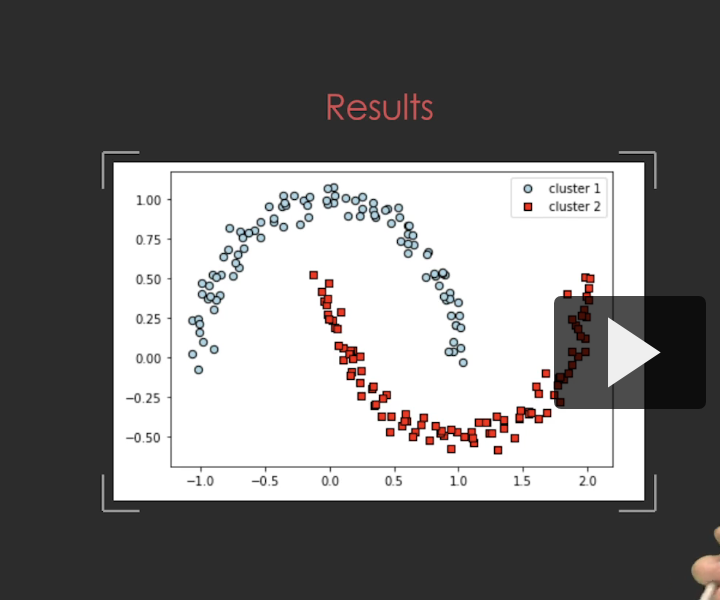

## Affinity Propagation

- based on message sending between pairs

- exemplars -- most representative of other samples

- messages sent between pairs represent the suitability for one sample to be the exemplar of the other

- iterative until convergence

- good when data inclues many clusters, uneven cluster size, non-flat geometry

- main drawback is complexity

## Additional Algorithms available in scikit-learn

- OPTICS
- Spectral Clustering
- Gaussian Mixters
- Birch
- Ward Hierarchical Clustering
- Mean-shift